# Lecture 5 - Value Function Approximation

provided by [Stanford CS234](https://www.youtube.com/watch?v=FgzM3zpZ55o)

---

<div class="alert alert-block alert-info">
Table of Contents: <br>
    
<ul>
    <li>1. <a href="#1.-Introduction">Introduction</a></li>
    <li>2. <a href="#2.-MC-Linear-Value-Function-Approximation-for-Policy-Evaluation">MC Linear Value Function Approximation for Policy Evaluation</a></li>
    <li>3. <a href="#3.-TD-Linear-Value-Function-Approximation-for-Policy-Evaluation">TD Linear Value Function Approximation for Policy Evaluation</a></li>
    <li>4. <a href="#4.-MC,-TD,-and-Q-Learning-Q-Value-Function-Approximation-for-Policy-Improvement">MC, TD, and Q-Learning Q-Value Function Approximation for Policy Improvement</a></li>
    <li>5. <a href="#5.-Resource">Resource</a></li>
</ul>
</div>

# 1. Introduction

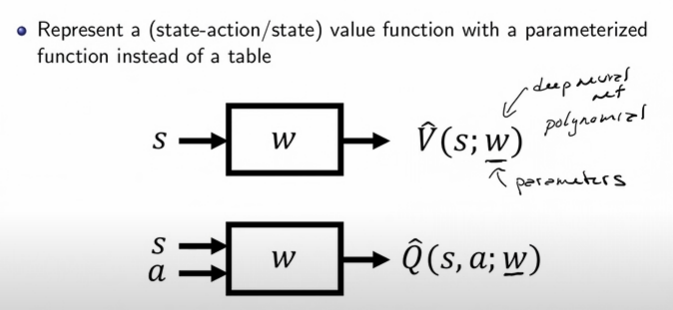 <br>
_Figure 1. Approximating a Value Function with a black box._

Instead of the iterative algorithms we had before to approximate the value functions. We can generalize this idea and say we have some network (or model; doesn't have to be deep learning) that takes in a state or state-action pair and computes the value or q-value.

We do this because we don't want to explicitly store dynamic, value/state-action values, policies (in the case where storing these are costly). We are essentially taking all of these and combining them into 1 black box. 

The benefits include:
* reduction in memory
* reduction in computation
* reduction in experience

There are many different function approximator algorithms (many include ML algorithms):
* Linear combinations of features
* Neural networks
* Decision Trees
* Nearest Neighbors
* Fourier / wavelet

This lecture focuses  on linear value function approximations and the next lecture focuses on neural networks. This class focuses on differentiable function approximators.

# 2. MC Linear Value Function Approximation for Policy Evaluation

You can think of VFA as another component that can be added to the Policy Evaluation module along with MC or TD methods. VFA is only relevant in the model-free context (in the model-based context we have the dynamics and transition model and we can converge to the true values). 

Let's say our input to this black box of weights is a vector.

$$x(s) = \begin{pmatrix}
x_{1}(s)\\
x_{2}(s)\\
...\\
x_{n}(s)\\
\end{pmatrix}$$

For now we consider VFA for value functions not Q functions.

Then, our VFA model will be:

$$
\hat{V}(s; \textbf{w}) = \sum_{j = 1}^{n}(x_{j}(s)w_{j}) = x(s)^{T}\textbf{w}
$$

For VFA in RL, it is common to use MSE as the objective function (or loss function). 

For Linear VFA, we assume the weights are just a vector:

$$
\textbf{w} = \begin{pmatrix}
w_{1}\\
w_{2}\\
...\\
w_{n}\\
\end{pmatrix}
$$

Below is the objective function and the weight update.

$$
J(\textbf{w}) = \mathbb{E}_{\pi}[(V^{\pi}(s) - \underbrace{\hat{V}(s; \textbf{w})}_{x(s)^{T}\textbf{w}} )^{2}]\\
\begin{equation}
    \begin{split}
        \Delta \textbf{w} & = -\frac{1}{2} \alpha \nabla_{\textbf{w}} J(\textbf{w})\\
        & = -\frac{1}{2} \alpha (2(V^{\pi}(s) - \hat{V}(s; \textbf{w}))) x(s)\\
        & = - \alpha (V^{\pi}(s) - \hat{V}(s; \textbf{w})) x(s)\\
        & = step-size ~~ x ~~ prediction ~ error ~~ x ~~ feature ~ value\\
    \end{split}
\end{equation}
$$

We don't have the true $V^{\pi}(s_{t})$, but we can approximate it with $G_{t}$ as it is an unbiased but noisy sample of the true expected return.

$$
\Delta \textbf{w} = \alpha (G_{t} - x(s_{t})^{T}\textbf{w}) x(s_{t}) \hspace{1em} (Eq.~1)\\
$$

Above is the final result of what a weight update looks like for a value function.

Initialize $\textbf{w} = 0$, $k = 1$ <br>
Loop <br>
$\quad$ Sample $k$-th episode $(s_{k, 1}, a_{k, 1}, r_{k, 1}, s_{k, 2}, ..., s_{k, L_{k}})$ given $\pi$ <br>
$\quad$ for $t = 1, ..., L_{k}$ do <br>
$\quad\quad$ if First/Every visit to (s) in episode $k$ then <br>
$\quad\quad\quad$ $G_{t}(s) = \sum_{j = t}^{L_{k}}r_{k, j}$ <br>
$\quad\quad\quad$ Update weights: $\textbf{w} = \textbf{w} - \alpha (G_{t}(s) - \hat{V}(s, \textbf{w}))x(s)$ <br>
$\quad$ $k = k + 1$ <br><br>

_Algorithm 1. Linear VFA with MC Policy Evaluation._

There is a proof of the convergence guarantees for Linear VFA with MC Policy Evaluation that I don't include here. It basically says that MC Policy Eval with VFA converges to a set of weights that has the minimum MSE possible.

An alternative to the iterative method we have in Algorithm 1 is the closed-form approach (or the analytical approach) to finding the weights that best minimize the MSE loss. This is very similar to linear regression.

If $G(s_{i})$ is an unbiased sample of the true expected return $V^{\pi}(s_{i})$, then

$$
\underset{\textbf{w}}{argmin} \sum_{i = 1}^{N} (G(s_{i}) - x(s_{i})^{T}\textbf{w})^{2}\\
$$

The above expression simply says to find the weight vector $\textbf{w}$ that minimizes the sum of squared difference between the unbiased sample of the true expected returns and the predicted true expected return.

$$
\textbf{w} = (X^{T}X)^{-1}X^{T}\textbf{G} \hspace{1em} (Eq.~2)\\
$$

Equation 1 is the iterative approach for finding the optimal weight vector and Equation 2 is the closed-form approach.

# 3. TD Linear Value Function Approximation for Policy Evaluation

Initialize $\textbf{w} = 0$, $k = 1$ <br>
Loop <br>
$\quad$ Sample tuple $(s_{k}, a_{k}, r_{k}, s_{k + 1})$ given $\pi$ <br>
$\quad$ Update weights: $\textbf{w} = \textbf{w} + \alpha(r + \gamma x(s')^{T}\textbf{w} - x(s)^{T}\textbf{w})x(s)$ <br>
$\quad$ $k = k + 1$ <br><br>

_Algorithm 2. Linear VFA with TD Policy Evaluation._

TD with Linear VFA is the same thing except instead of $G$, we have a bootstrapped and sample estimated plugged in. Practically TD learning converges faster to its fixed value function approximation point.

# 4. MC, TD, and Q-Learning Q-Value Function Approximation for Policy Improvement

The above sections detail how to find the optimal value function. The below focuses on finding the optimal q-value function. Because q-value functions account for states and actions, they can be used for policy evaluation (and the very simple policy improvement as we saw in Lecture 4). In this scenario, we will see how q-value VFA will be integrated into the model-free algorithms we saw last time for policy iteration (which includes evaluation and improvement). 

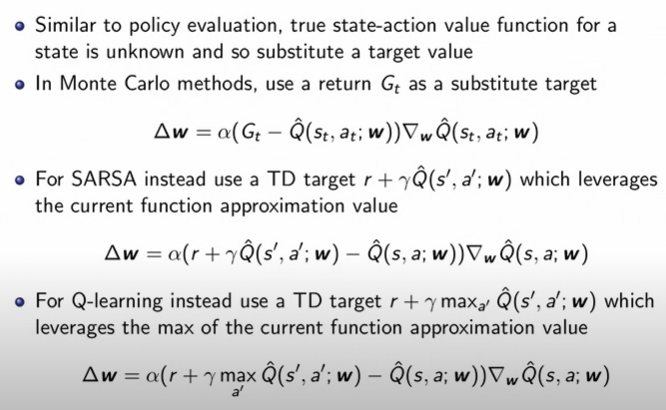 <br>
_Figure 2. Weight update methods for Linear VFA in model-free policy iteration algorithms._

These weight update methods simply take the spot of the lookup table update in the algorithms in Lecture 4.

Also, note that because we are approximating the value function, our control is based on these feature representations. Whereas before in the model-based lecture (Lecture 2), we saw that the Bellman backup was a contraction, VFA can result in an expansion.

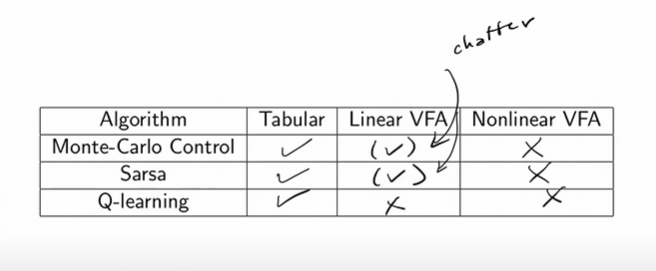 <br>
_Figure 3. Convergence chart for different policy iteration algorithms with tabular, VFA, and nonlinear VFA._

Basically, MC and SARSA converge but with chatter (noise) for linear VFA. 

# 5. Resource

If you missed the link right below the title, I'm providing the resource here again along with the course website.

- [Stanford CS234](https://www.youtube.com/watch?v=FgzM3zpZ55o)
- [Course Website](http://web.stanford.edu/class/cs234/index.html)

This is a series of 15 lectures provided by Stanford.
